In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import math
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def createFileList(myDir, format='.png'):
    fileList = []
    listi = []
    i=0
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileis = cv2.resize(cv2.imread(fullName),(256,256))
                #plt.imshow(Image.open(fullName))
                #clahe = cv2.createCLAHE(clipLimit=0.01, tileGridSize=(4,4))
                #cl1 = clahe.apply(fileis)
                #plt.imshow(cl1)
                #filee = np.array(fileis)
                fileList.append(fileis)  
    return fileList

# load the original image
data_1 = createFileList('D:/Dcode/ML/Dataset/mri_brain/data_1')
data_2 = createFileList('D:/Dcode/ML/Dataset/mri_brain/data_2')
data_3 = createFileList('D:/Dcode/ML/Dataset/mri_brain/data_3')

D:/Dcode/ML/Dataset/mri_brain/data_1
D:/Dcode/ML/Dataset/mri_brain/data_2
D:/Dcode/ML/Dataset/mri_brain/data_3


In [3]:
data_generator = ImageDataGenerator(rotation_range = 10,width_shift_range = 0.1,height_shift_range = 0.1,shear_range = 0.1, zoom_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')

In [4]:
def createlabel(Listt,num,n):
    filel = []
    for i in range(num):
        filel.append(n)
    return filel

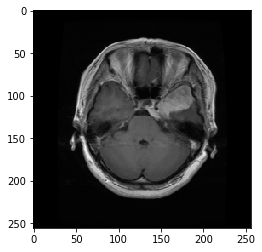

In [5]:
plt.imshow(data_1[0])

In [6]:
data_1[0].shape

(256, 256, 3)

In [7]:
with tf.device('/device:GPU:0'):
    dataaug_1 = []
    for j in range(len(data_1)):
        datat_1 = img_to_array(data_1[j])
        datat_1 = datat_1.reshape((1,)+datat_1.shape)
        i = 0
        for batch in data_generator.flow(datat_1):
            dataaug_1.append(np.array(array_to_img(batch[0])))
            i+=1
            if i%4 == 0:
                break

In [8]:
with tf.device('/device:GPU:0'):
    dataaug_2 = []
    for j in range(len(data_2)):
        datat_2 = img_to_array(data_2[j])
        datat_2 = datat_2.reshape((1,)+datat_2.shape)
        i = 0
        for batch in data_generator.flow(datat_2):
            dataaug_2.append(np.array(array_to_img(batch[0])))
            i+=1
            if i%4 == 0:
                break

In [9]:
with tf.device('/device:GPU:0'):
    dataaug_3 = []
    for j in range(len(data_3)):
        datat_3 = img_to_array(data_3[j])
        datat_3 = datat_3.reshape((1,)+datat_3.shape)
        i = 0
        for batch in data_generator.flow(datat_3):
            dataaug_3.append(np.array(array_to_img(batch[0])))
            i+=1
            if i%4 == 0:
                break

In [10]:
len(dataaug_3)

1400

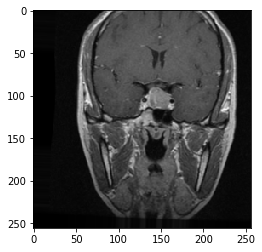

In [12]:
plt.imshow(dataaug_3[1])

In [13]:
datal_1 = createlabel(dataaug_1,len(dataaug_1),0)
datal_2 = createlabel(dataaug_2,len(dataaug_2),1)
datal_3 = createlabel(dataaug_3,len(dataaug_3),2)
datal_4 = createlabel(dataaug_1,len(data_1),0)
datal_5 = createlabel(dataaug_1,len(data_2),1)
datal_6 = createlabel(dataaug_1,len(data_3),2)

In [14]:
DList = []
DList = data_1+data_2+data_3+dataaug_1+dataaug_2+dataaug_3#+normal

In [15]:
DList = np.array(DList)
DList = DList/255.0
DList.shape

(4200, 256, 256, 3)

In [16]:
Dlabel = []
Dlabel = datal_4+datal_5+datal_6+datal_1+datal_2+datal_3#+datal_n
Dlabel = np.array(Dlabel)
print(Dlabel.shape)
Dlabel[2099]

(4200,)


1

In [18]:
DList = DList.reshape((15320,256,256,3))

In [19]:
DList.shape

(4200, 256, 256, 3)

In [20]:
model = keras.models.Sequential()

In [21]:
model.add(keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (256,256,3)))

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
model.add(keras.layers.AveragePooling2D(2,2))

In [23]:
model.add(keras.layers.Dropout(0.2))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
model.add(keras.layers.Conv2D(32,(3,3),activation = 'relu'))

In [25]:
model.add(keras.layers.AveragePooling2D(2,2))

In [26]:
model.add(keras.layers.Flatten())

In [27]:
model.add(keras.layers.Dense(64,activation = 'relu'))

In [28]:
model.add(keras.layers.Dense(3,activation = 'softmax'))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 127, 127, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 62, 62, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 123008)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                7872576   
__________

In [30]:
model.compile(optimizer= 'Nadam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [31]:
#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

In [32]:
traind , testd, trainl,testl = train_test_split(DList,Dlabel,test_size = 0.3,random_state = 42)

In [35]:
#traind = DList[0:9000]
#testd = DList[9001:10500]
#trainl = Dlabel[0:9000]
#testl = Dlabel[9001:10500]

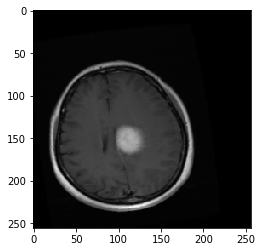

In [33]:
plt.imshow(traind[3])

In [34]:
traind.shape

(3360, 256, 256, 3)

In [35]:
trainl.shape

(3360,)

In [36]:
with tf.device('/device:GPU:0'):
    history = model.fit(traind,trainl,epochs = 10,validation_split = 0.1)

Train on 2688 samples, validate on 672 samples
Epoch 1/10
2688/2688 [==============================] - 27s 10ms/sample - loss: 0.7260 - acc: 0.5580 - val_loss: 12.1623 - val_acc: 0.0000e+00
Epoch 2/10
2688/2688 [==============================] - 12s 5ms/sample - loss: 0.6327 - acc: 0.6536 - val_loss: 7.0947 - val_acc: 0.0074
Epoch 3/10
2688/2688 [==============================] - 12s 5ms/sample - loss: 0.5705 - acc: 0.7143 - val_loss: 9.0371 - val_acc: 0.0863
Epoch 4/10
2688/2688 [==============================] - 12s 5ms/sample - loss: 0.3887 - acc: 0.8315 - val_loss: 11.3255 - val_acc: 0.0714
Epoch 5/10
2688/2688 [==============================] - 13s 5ms/sample - loss: 0.2795 - acc: 0.8843 - val_loss: 11.8433 - val_acc: 0.0997
Epoch 6/10
2688/2688 [==============================] - 12s 5ms/sample - loss: 0.1153 - acc: 0.9583 - val_loss: 13.3061 - val_acc: 0.0967
Epoch 7/10
2688/2688 [==============================] - 12s 4ms/sample - loss: 0.0543 - acc: 0.9821 - val_loss: 13.5872 - 

In [37]:
loss,acc = model.evaluate(testd,testl)

840/840 [==============================] - 2s 2ms/sample - loss: 16.0025 - acc: 0.0000e+00


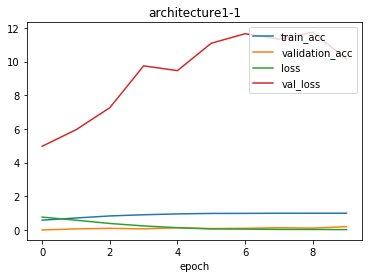

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('architecture1-1')
plt.xlabel('epoch')
plt.legend(['train_acc', 'validation_acc','loss','val_loss'], loc='upper right')
plt.show()
plt.savefig('arch1-1.png')

In [64]:
model.save('cnn.h5')

In [65]:
model_new = keras.models.load_model('cnn.h5')

In [66]:
model_new.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
average_pooling2d_3 (Average (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
average_pooling2d_4 (Average (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                7872576   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total para

In [73]:
predictions= model.predict(test_data)

In [74]:
np.argmax(predictions[0])

7

In [75]:
test_labels[0]

7